In [58]:
import numpy as np
import pandas as pd
data=pd.read_csv("C:/Users/Meghna B/Documents/internshipdata2.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [59]:
data['a']=data[["Annual Income (k$)"]]
data['b']=data[["Spending Score (1-100)"]]

In [60]:
X=data[['a','b']]
X.head()

,a,b
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

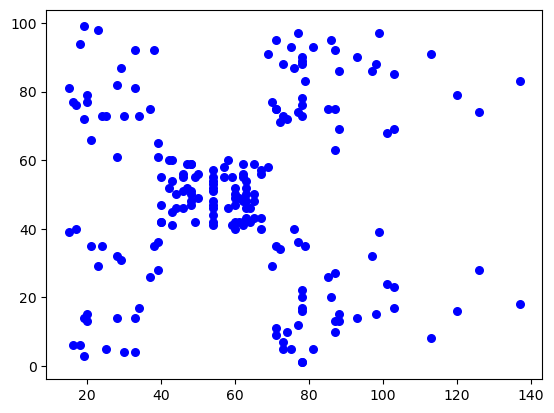

In [62]:
plt.scatter(X['a'],X['b'],s=30,c='b')
plt.show()

In [63]:
import warnings
warnings.filterwarnings('ignore')
kmean=KMeans(n_clusters=5)
kmean.fit(X)
centers=kmean.cluster_centers_
print(kmean.cluster_centers_)


[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


In [64]:
clusters=kmean.fit_predict(X)
data['label']=clusters
data.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),a,b,label
0,1,Male,19,15,39,15,39,1
1,2,Male,21,15,81,15,81,3
2,3,Female,20,16,6,16,6,1
3,4,Female,23,16,77,16,77,3
4,5,Female,31,17,40,17,40,1
5,6,Female,22,17,76,17,76,3
6,7,Female,35,18,6,18,6,1
7,8,Female,23,18,94,18,94,3
8,9,Male,64,19,3,19,3,1
9,10,Female,30,19,72,19,72,3


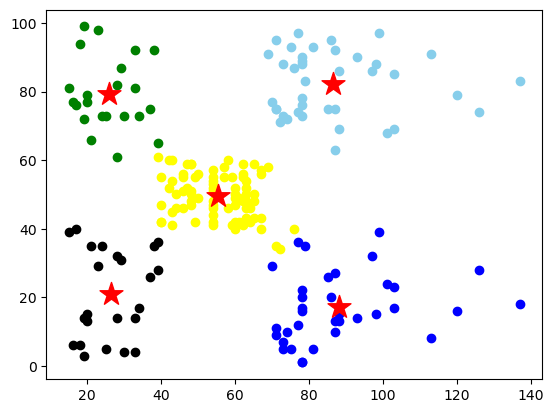

In [65]:
c=['yellow','black','skyblue','green','blue']
for i in range(5):
    a=c[i]
    plt.scatter(data.a[data.label==i],data.b[data.label==i],c=a,label='cluster')
plt.scatter(centers[:,0],centers[:,1],marker='*',s=300,
           c='r',label='centroid')

In [66]:
Y=X.loc[:,['a','b']].values
Y

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

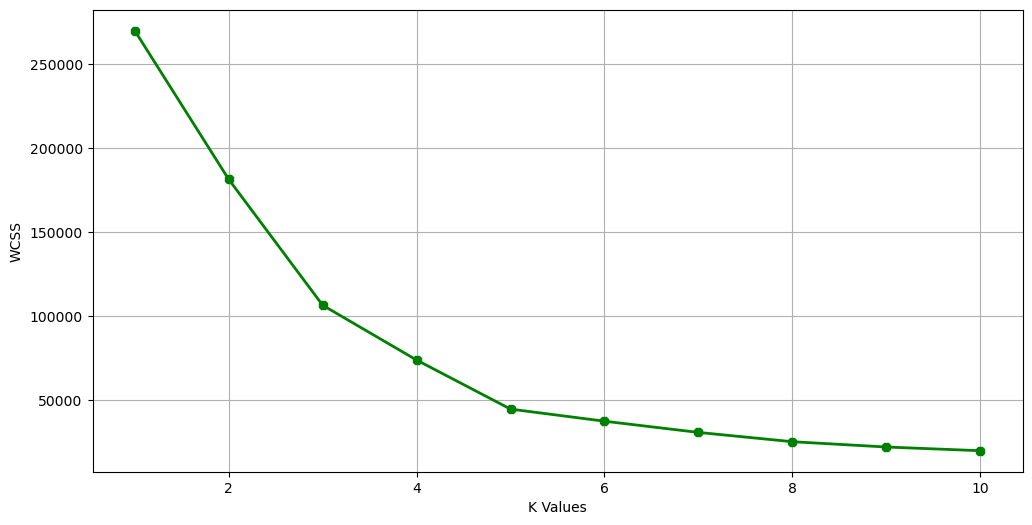

In [68]:
wcss=[]
for j in range(1,11):
    kmeans=KMeans(n_clusters=j,init='k-means++')
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='green',marker='8')
plt.xlabel("K Values")
plt.ylabel("WCSS")
plt.show()